In [1]:
from utils import *
from main  import *
from other import *

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Equity Transactions

In [2]:
def get_min(x):
    
    h = x // 3600
    m = x % 3600 // 60
    s = x % 60
    
    return h*60 + m


def get_sec(x):
    
    h = x // 3600
    m = x % 3600 // 60
    s = x % 60
    
    return h*3600 + m*60 + s


def get_points(df, date):
    
    tmp = df[(df['DATE']==date)]
    ms = pd.unique(tmp['m'])
    mask = (ms[1] < tmp['m'])&(tmp['m'] < ms[-2])  # remove first and last 2 minute
    points = np.array(tmp[mask]['t'] - tmp[mask]['t'].min())
    points /= points.max()
    
    return points

def check_trunc_level(points):
    n = len(points)
    Delta_n_inv = int((n)**(1/2))
    Delta_n = 1/Delta_n_inv

    dN, bins = np.histogram(points, bins=Delta_n_inv)
    hat_lamb = dN/Delta_n

    diff = hat_lamb[1:] - hat_lamb[:-1]
    trunc_level = np.sqrt(np.mean(diff**2)) * Delta_n**(-1/3)

    trunc_level = .8
    plt.plot(hat_lamb)
    plt.show()
    plt.plot(hat_lamb[1:] - hat_lamb[:-1])
    plt.axhline(np.sqrt(np.mean(diff**2)))
    plt.axhline(np.sqrt(np.mean(diff**2)) * Delta_n**(-1/4) * trunc_level, c='red')
    plt.axhline(-np.sqrt(np.mean(diff**2)) * Delta_n**(-1/4) * trunc_level, c='red')
    plt.show()

In [3]:
name = 'AAPL'
df = pd.read_hdf("data/equity/%s.h5"%name, key='key')
df = df.rename(columns={'TIME_M':'t'})
df['m'] = df['t'].apply(get_min)
df['s'] = df['t'].apply(get_sec)
dates = pd.unique(df['DATE'])

In [20]:
date = dates[4]
points = get_points(df, date)

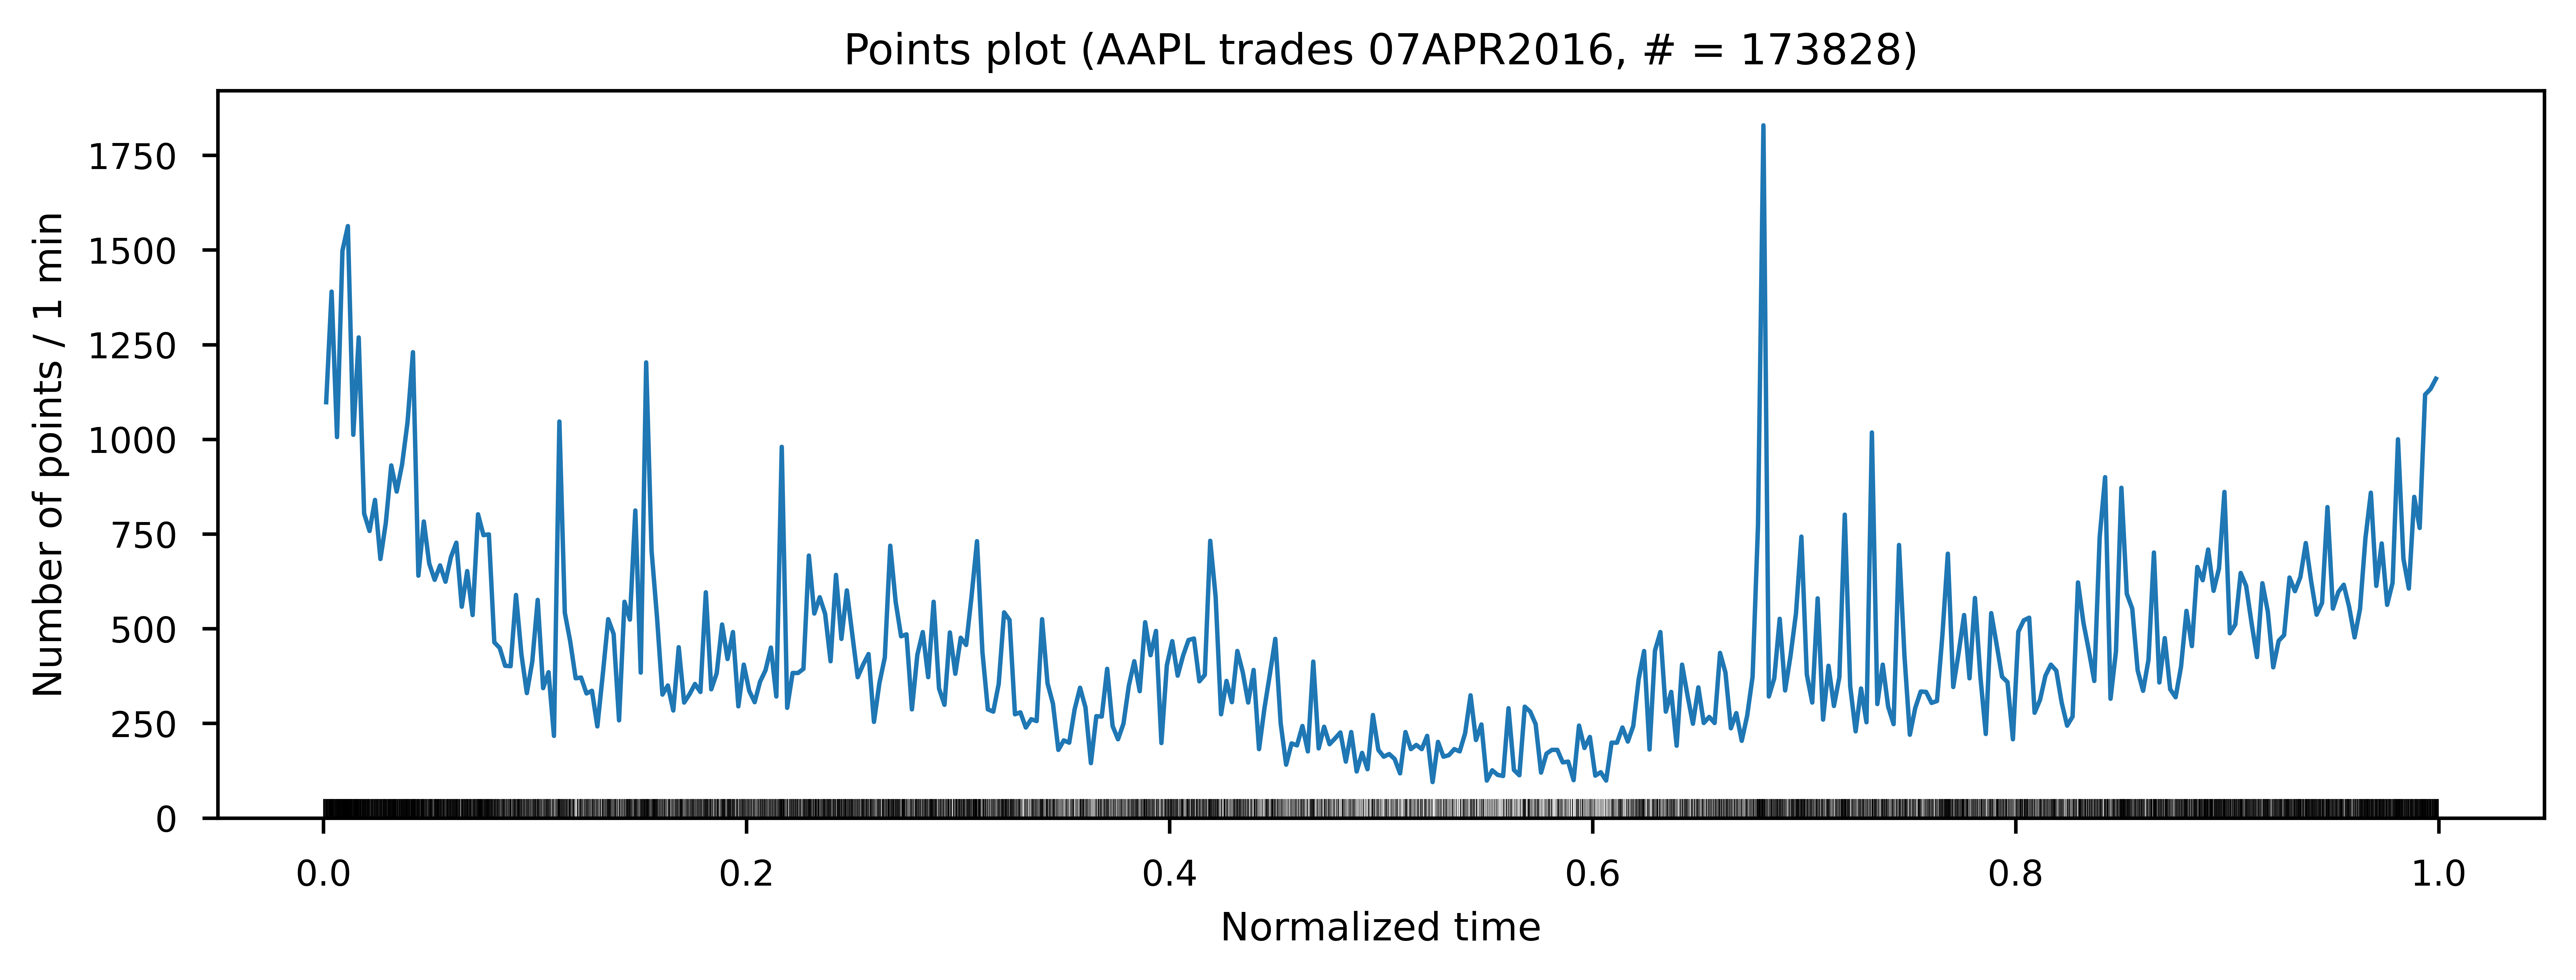

In [125]:
####### Parameters ########
save = IMG_PATH + "emp/clustering_illustration(%s,%s).png"%(name, date)
###########################

dN, bins = np.histogram(points, bins=390)  # 1 min counting
delta = bins[1] - bins[0]
fig = plt.figure(figsize=(8,3), dpi=1200).get_figure()
plt.plot(bins[:-1] + delta/2, dN, lw=1)
plt.vlines(points[::10], 0,50, color='black', alpha=.5, lw=.1)
plt.title("Points plot (%s trades %s, # = %d)"%(name, date, len(points)))
plt.ylim(0, dN.max()*1.05)
plt.tight_layout()
plt.xlabel('Normalized time')
plt.ylabel('Number of points / 1 min')

if save != "":
    fig.savefig(save, bbox_inches="tight")

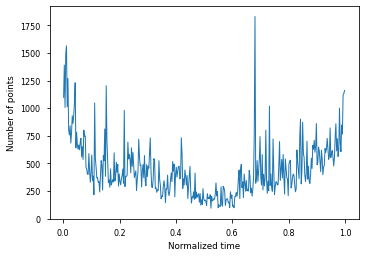

In [6]:
####### Parameters ########
save = IMG_PATH + "sim/intensity_plot(%s,%s).pdf"%(name, date)
###########################

dN, bins = np.histogram(points, bins=390)  # 1 min counting
delta = bins[1] - bins[0]
fig = plt.figure(figsize=(5,3.5)).get_figure()
plt.plot(bins[:-1] + delta/2, dN, lw=1)
#plt.vlines(points[::10], 0,50, color='black', alpha=.2, lw=.05)
#plt.title("Intensity plot (%s trades %s, # = %d)"%(name, date, len(points)))
plt.ylim(0,dN.max()*1.05)
plt.tight_layout()
plt.xlabel('Normalized time')
plt.ylabel('Number of points')

if save != "":
    fig.savefig(save, bbox_inches="tight")

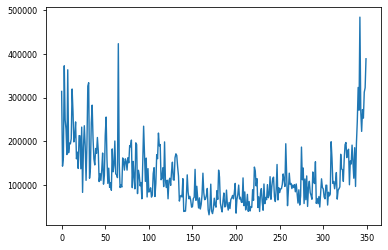

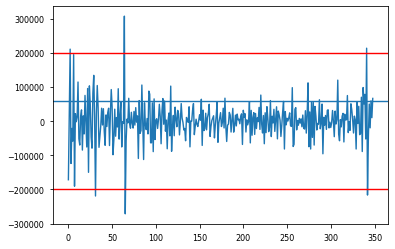

In [8]:
check_trunc_level(points)

## S&P futures mid-price changes

In [2]:
name = 'ESZ2020'
data = joblib.load('data/E-mini_sample/%s.dat'%name)
dates = np.array(list(data.keys()))

(0.0, 3639.3)

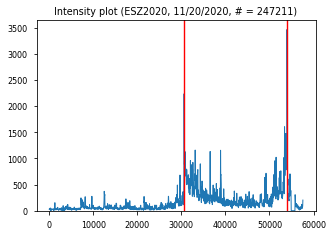

In [171]:
# Check Regular Trading Hour
date = dates[362]
points = data[date]['trade']
dN, bins = np.histogram(points, bins=24*60)  # 1 min counting
delta = bins[1] - bins[0]
plt.figure(figsize=(5,3.5))
plt.plot(bins[:-1] + delta/2, dN, lw=1)
plt.axvline(8.5*3600, c='red')
plt.axvline(15*3600, c='red')
plt.title("Intensity plot (%s, %s, # = %d)"%(name, date, len(points)))
plt.ylim(0,dN.max()*1.05)

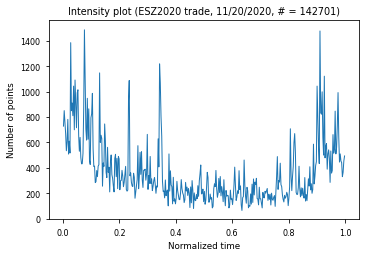

In [172]:
####### Parameters ########
typ  = 'trade'
save = IMG_PATH + "sim/intensity_plot(%s %s, %s).pdf"%(name, typ, date.replace('/','-'))
###########################

points = filter_time(data[date][typ])
points -= points.min()
points /= points.max()
dN, bins = np.histogram(points, bins=390)  # 1 min counting
delta = bins[1] - bins[0]
fig = plt.figure(figsize=(5,3.5)).get_figure()
plt.plot(bins[:-1] + delta/2, dN, lw=1)
plt.title("Intensity plot (%s %s, %s, # = %d)"%(name, typ, date, len(points)))
plt.ylim(0,dN.max()*1.05)
plt.tight_layout()
plt.xlabel('Normalized time')
plt.ylabel('Number of points')

if save != "":
    fig.savefig(save, bbox_inches="tight")

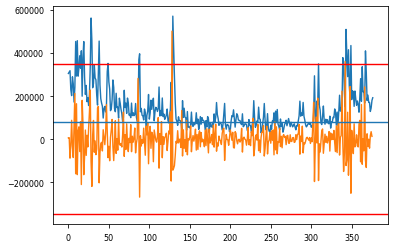

In [167]:
check_trunc_level(points)

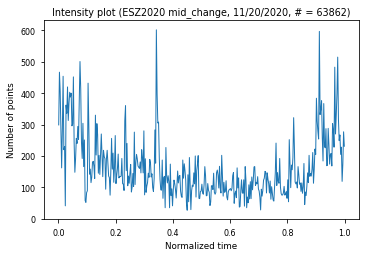

In [173]:
####### Parameters ########
typ  = 'mid_change'
save = IMG_PATH + "sim/intensity_plot(%s %s, %s).pdf"%(name, typ, date.replace('/','-'))
###########################

points = filter_time(data[date][typ])
points -= points.min()
points /= points.max()
dN, bins = np.histogram(points, bins=390)  # 1 min counting
delta = bins[1] - bins[0]
fig = plt.figure(figsize=(5,3.5)).get_figure()
plt.plot(bins[:-1] + delta/2, dN, lw=1)
plt.title("Intensity plot (%s %s, %s, # = %d)"%(name, typ, date, len(points)))
plt.ylim(0,dN.max()*1.05)
plt.tight_layout()
plt.xlabel('Normalized time')
plt.ylabel('Number of points')

if save != "":
    fig.savefig(save, bbox_inches="tight")

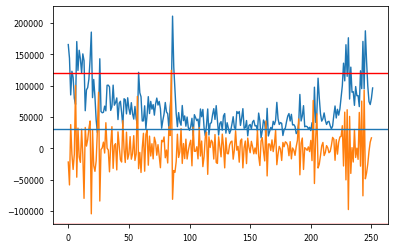

In [135]:
# Check truncation level
n = len(points)
Delta_n_inv = int((n)**(1/2))
Delta_n = 1/Delta_n_inv

dN, bins = np.histogram(points, bins=Delta_n_inv)
hat_lamb = dN/Delta_n

diff = hat_lamb[1:] - hat_lamb[:-1]
trunc_level = np.sqrt(np.mean(diff**2)) * Delta_n**(-1/3)

trunc_level = 1
plt.plot(hat_lamb)
plt.show()
plt.plot(hat_lamb[1:] - hat_lamb[:-1])
plt.axhline(np.sqrt(np.mean(diff**2)))
plt.axhline(np.sqrt(np.mean(diff**2)) * Delta_n**(-1/4) * trunc_level, c='red')
plt.axhline(-np.sqrt(np.mean(diff**2)) * Delta_n**(-1/4) * trunc_level, c='red')
plt.show()

## Simulation

In [7]:
from DGP import *


def gen_mu_sigma2(t, typ, seed):
    
    np.random.seed(seed)
    
    if typ == 'flat':
        mu = np.repeat(1., len(t))
        sigma2 = 0
        return mu, sigma2
    
    elif typ == 'U-shape':
        mu = np.array([-1])
        sigma = 0
        while any(mu < 0):
            mu = gen_U_shape_CIR(t, np.random.randint(10000000), sigma=sigma)
        sigma2 = mu*sigma**2
        return mu, sigma2
    
    elif typ == 'CIR':
        mu = np.array([-1])
        sigma = 3 # 1.5
        while any(mu < 0):
            mu = gen_U_shape_CIR(t, np.random.randint(10000000), sigma=sigma)
        sigma2 = mu*sigma**2
        return mu, sigma2
    
    else:
        raise NotImplementedError("Not implemented for type '%s'"%typ)


def DGP6(seed, n):
    
    mu, sigma2 = gen_mu_sigma2(t, 'CIR', seed)
    mu += get_burst(mu, seed)
    
    BR = 0.8
    mu *= 1 - BR
    sigma2 *= (1 - BR)**2
    beta = 2.0
    alpha = BR * beta
    points = gen_HawkesExpKernels(t, mu, alpha=alpha, beta=beta, 
                                  n=n, seed=seed)
    
    return points, mu, sigma2, BR

def DGP9(seed, n):
    
    mu, sigma2 = gen_mu_sigma2(t, 'CIR', seed)
    mu += get_burst(mu, seed)
    
    BR = 0.8
    mu *= 1 - BR
    sigma2 *= (1 - BR)**2
    cutoff = 1
    exponent = 1 + 2
    multiplier = BR / cutoff**(1-exponent) * (exponent - 1)
    points = gen_HawkesPowerKernels(t, mu, multiplier=multiplier, 
                                    exponent=exponent, cutoff=cutoff,
                                    n=n, seed=seed)
    
    return points, mu, sigma2, BR

(0.0, 1.0)

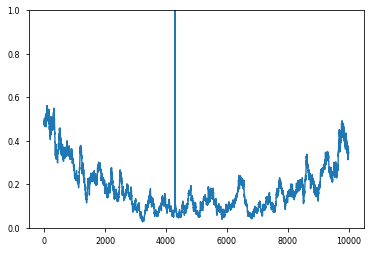

In [55]:
dt = 1/1000000
t = np.arange(0,1,dt)
seed = 20
n = 170000

points, mu, sigma2, BR = DGP6(seed, n)
plt.plot(mu[::100])
plt.ylim(0,1)

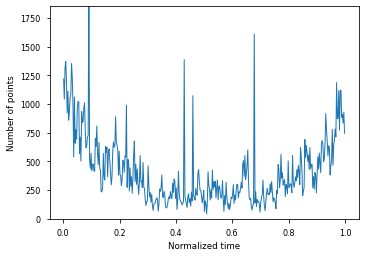

In [56]:
####### Parameters ########
name = 'simulation Model 6'
save = IMG_PATH + "/sim/intensity_plot(%s).pdf"%(name)
###########################

dN, bins = np.histogram(points, bins=390)  # 1 min counting
delta = bins[1] - bins[0]
fig = plt.figure(figsize=(5,3.5)).get_figure()
plt.plot(bins[:-1] + delta/2, dN, lw=1)
#plt.title("Intensity plot (%s, # = %d)"%(name, len(points)))
plt.ylim(0, 1850)
plt.tight_layout()
plt.xlabel('Normalized time')
plt.ylabel('Number of points')

if save != "":
    fig.savefig(save, bbox_inches="tight")

In [ ]:
dt = 1/1000000
t = np.arange(0,1,dt)
seed = 20
n = 170000

points, mu, sigma2, BR = DGP9(seed, n)

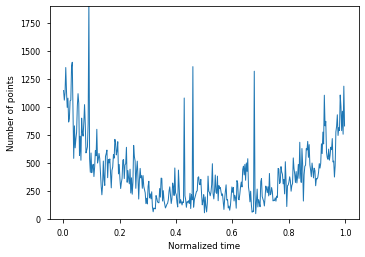

In [58]:
####### Parameters ########
name = 'simulation Model 9'
save = IMG_PATH + "sim/intensity_plot(%s).pdf"%(name)
###########################

dN, bins = np.histogram(points, bins=390)  # 1 min counting
delta = bins[1] - bins[0]
fig = plt.figure(figsize=(5,3.5)).get_figure()
plt.plot(bins[:-1] + delta/2, dN, lw=1)
#plt.title("Intensity plot (%s, # = %d)"%(name, len(points)))
plt.ylim(0, 1900)#dN.max()*1.05)
plt.tight_layout()
plt.xlabel('Normalized time')
plt.ylabel('Number of points')

if save != "":
    fig.savefig(save, bbox_inches="tight")

## Flash Crash vs COVID Crash

In [3]:
FLASH_DATE  = '05/06/2010'
COVID_DATE  = '02/20/2020'

FLASH_TITLE = "Flash crash (%s)"%FLASH_DATE
COVID_TITLE = "COVID-19 crash (%s)"%COVID_DATE

In [4]:
%%time
data1 = joblib.load("data/E-mini_sample/ESM2010.dat")
data2 = joblib.load("data/E-mini_sample/ESH2020.dat")

datas = [data1, data2]

CPU times: user 1.04 s, sys: 1.98 s, total: 3.01 s
Wall time: 3.27 s


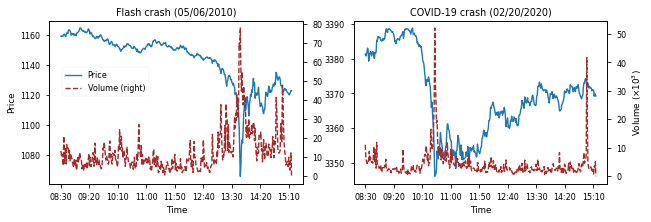

In [5]:
####### Parameters ########
save = IMG_PATH + "emp/flash_vs_covid_crash.pdf"
###########################
START = 8.5 * 60
END   = 15.25 * 60

row = 1
col = 2
figsize = (10, row*3)

datas  = [data1, data2]
dates  = [FLASH_DATE, COVID_DATE]
titles = [FLASH_TITLE, COVID_TITLE]

fig, axs = plt.subplots(row, col, figsize=figsize)
for i in range(col):
    data  = datas[i]
    date  = dates[i]
    title = titles[i]

    price  = data[date]['price']
    volume = data[date]['volume'] / 1000
    
    mask   = (price.index >= START) & (price.index <= END)
    price  = price[mask]
    volume = volume[mask]
    
    tmp = pd.merge(price.to_frame(), volume.to_frame(),
                   left_index=True, right_index=True)
    tmp.index = pd.to_timedelta(price.index, unit='m')
    tmp.index = (pd.to_datetime(0) + tmp.index).strftime("%H:%M")
    tmp.index.name = 'Time'
    tmp['Price'].plot(ax=axs[i], ylabel='Price')
    tmp['Volume'].plot(ax=axs[i], c='brown', ls='--', label='Volume', secondary_y=True)
    
    if i == 0:
        lines = axs[i].get_lines() + axs[i].right_ax.get_lines()
        axs[i].legend(lines, [l.get_label() for l in lines], loc=(0.05,0.54))
    if i == col - 1:
        axs[i].yaxis.label.set_visible(False)
        axs[i].right_ax.set_ylabel("Volume ($\\times 10^3$)")
    axs[i].set_title(title)
    
if save != "":
    fig.savefig(save, bbox_inches="tight")

In [6]:
def get_points(tmp):
    tmp = tmp[(tmp > START * 60) & (tmp < END * 60)]
    return to_0_1(tmp)

def f(tmp, ylim=None, **kwargs):
    a = get_points(tmp)
    dN, _ = np.histogram(a, bins = int(np.sqrt(len(a))))
    plt.plot(dN)
    if ylim is not None:
        plt.ylim(ylim)
    x = BR_estimation(a, truncation=False, **kwargs)['BR']
    y = BR_estimation(a, truncation=True, **kwargs)['BR']
    plt.title('N = %d, BR = %.3f (no trunc), %.3f (trunc)'%(len(a), x, y))
    plt.show()

In [7]:
typ = 'mid_change'
points1 = get_points(data1[FLASH_DATE][typ])
points2 = get_points(data2[COVID_DATE][typ])

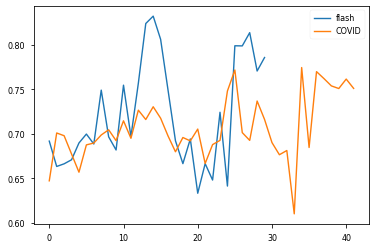

In [8]:
LEN = 42000
DIF = 1000

ys = []
xs = np.arange(0, (len(points1) - LEN) // DIF)
for x in xs:
    points = points1[x*DIF:x*DIF+LEN]
    ys.append(BR_estimation(points)['BR'])
plt.plot(xs,ys, label='flash')

ys = []
xs = np.arange(0, (len(points2) - LEN) // DIF)
for x in xs:
    points = points2[x*DIF:x*DIF+LEN]
    ys.append(BR_estimation(points)['BR'])
plt.plot(xs,ys, label='COVID')
plt.legend()

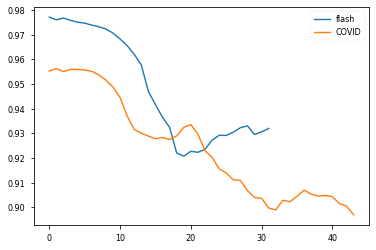

In [9]:
# Hardiman's moving window plot is useless because it just captures nothing but
# the time trend, not local BR.
LEN = 40000
DIF = 1000

ys = []
xs = np.arange(0, (len(points1) - LEN) // DIF)
for x in xs:
    points = points1[x*DIF:x*DIF+LEN]
    ys.append(Hardiman(points)['BR'])
plt.plot(xs,ys, label='flash')

ys = []
xs = np.arange(0, (len(points2) - LEN) // DIF)
for x in xs:
    points = points2[x*DIF:x*DIF+LEN]
    ys.append(Hardiman(points)['BR'])
plt.plot(xs,ys, label='COVID')
plt.legend()

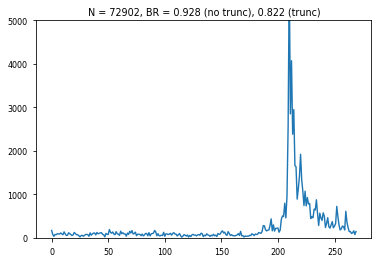

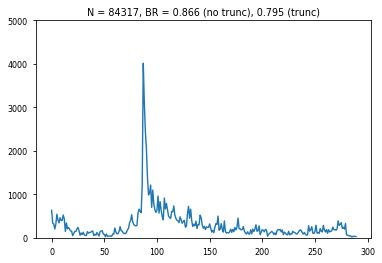

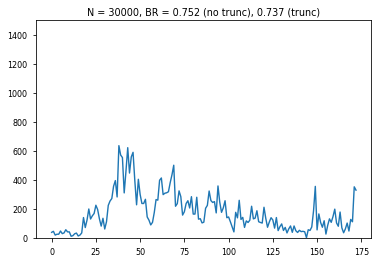

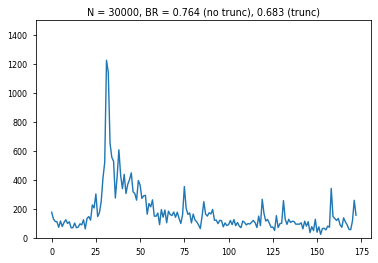

In [10]:
# In the Flash crash, the intensity does not increase abruptly, while the COVID
# crisis exploits abrupt intensity burst which is impossible to be explained by
# Hawkes self-exciting nature. 
# As you notice that the truncation discards the exogenous abrupt chnage which 
# cannot be explained by internal mechanism, truncation of the estimated 
# intensity illustrates this simple fact.
# Furthermore, fluctuation in the flash crash is more severe than than COVID
# crisis case because the heavy interaction between the market participants
# makes this unstable pattern, while the COVID crash does not show any kind of 
# this pattern.

f(data1[FLASH_DATE][typ], ylim=(0,5000))
f(data2[COVID_DATE][typ], ylim=(0,5000))
a, b = 34000, 30000
f(data1[FLASH_DATE][typ][a:a+b], ylim=(0,1500))
f(data2[COVID_DATE][typ][a:a+b], ylim=(0,1500))

In [11]:
def get_estimates(points, estimators, 
                  division=20, verbose=False):
    resss = []
    for i in range(division):
        chunk = points[(i/division <= points) & (points < (i+1)/division)]
        ress = []
        if len(chunk) <= 4:
            ress = [{'n':len(chunk), 'BR':np.nan}] * len(estimators)
        else:
            for estimator in estimators:
                res = estimator(chunk)
                ress.append(res)
        resss.append(ress)
        if verbose:
            print(str(i+1) + ": " + str(res['N']) +" ", end='\t')

    return resss

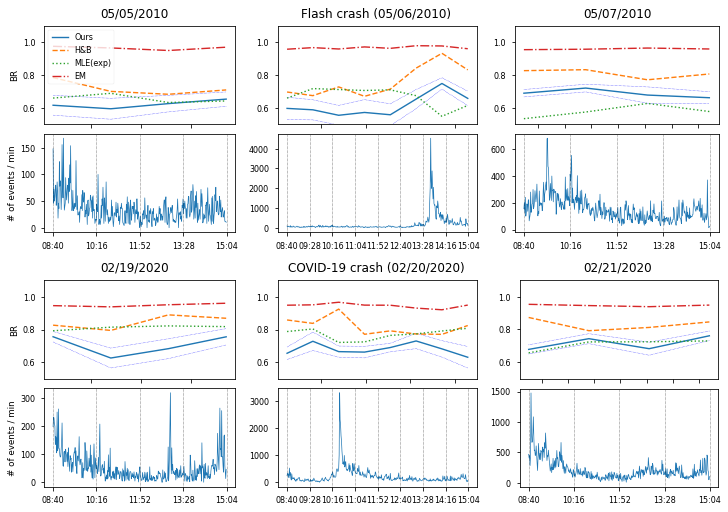

In [61]:
######### Parameters ##########
save = IMG_PATH + "emp/flash_vs_covid_BR.pdf"
###############################
typ = 'mid_change'
dates = ['05/05/2010', FLASH_DATE, '05/07/2010',
         '02/19/2020', COVID_DATE, '02/21/2020',
        ]
titles = ['05/05/2010', FLASH_TITLE, '05/07/2010',
          '02/19/2020', COVID_TITLE, '02/21/2020',
         ]
START = 8.5 * 60 + 10
END   = 15.25 * 60 - 10
estimators  = [BR_estimation, Hardiman, Exp_estimation, EM_estimation]
names       = ['Ours', 'H&B', 'MLE(exp)', 'EM']
line_styles = ['-', '--', ':','-.']

row = 2
col = 3
figsize = (10, 1 + row*3)

fig = plt.figure(constrained_layout=True, figsize=figsize)
subfigs = fig.subfigures(row, col)

for ind, subfig in enumerate(subfigs.flat):
    if ind in [1,4]:
        division = 8
    else:
        division = 4

    subfig.suptitle(titles[ind], x=.55)
    axs  = subfig.subplots(2, 1)
    date = dates[ind]
    tmp  = datas[ind//col][date][typ]
    tmp  = tmp[(tmp > START * 60) & (tmp < END * 60)]
    
    points = to_0_1(tmp)
    times  = np.arange(tmp[0], tmp[-1], (tmp[-1] - tmp[0]) / division)
    resss  = get_estimates(points, estimators, division=division)
    
    for k in range(len(estimators)):
        BRs = [j[k]['BR'] for j in resss]
        axs[0].plot(times, BRs, ls=line_styles[k], label=names[k])
        try:
            errs = [j[k]['SD(BR)'] for j in resss]
            axs[0].plot(times, np.array(BRs)+np.array(errs),
                        ls=':', lw=.5, c='blue')
            axs[0].plot(times, np.array(BRs)-np.array(errs),
                        ls=':', lw=.5, c='blue')
        except:
            pass

    axs[0].set_ylabel("BR")
    axs[0].xaxis.set_ticklabels([])
    axs[0].set_ylim(0.5, 1.1)

    price = copy(datas[ind//col][date]['price'])
    price = price[(price.index >= START) & (price.index <= END)]
    dN, _ = np.histogram(points, len(price))
    pd.Series(dN, index=np.arange(tmp[0], tmp[-1]-.01, (tmp[-1]-tmp[0])/len(dN)))\
             .plot(ax=axs[1], lw=.7)
    times = np.arange(tmp[0], tmp[-1] + (tmp[-1]-tmp[0])/division-.0000001, (tmp[-1]-tmp[0])/division)
    for t_i in times:
        axs[1].axvline(t_i, c='black', ls=':', lw=.5)
    axs[1].set_ylabel("# of events / min")
    axs[1].set_xticks(times, labels=format_minute(tmp[0], tmp[-1] + (tmp[-1]-tmp[0])/division, division+1))
    if ind == 0:
        axs[0].legend(loc="upper left")
    if ind % col != 0:
        axs[0].set_ylabel("")
        axs[1].set_ylabel("")
    for ax in axs:
        ax.label_outer()

if save != "":
    fig.savefig(save, bbox_inches="tight")

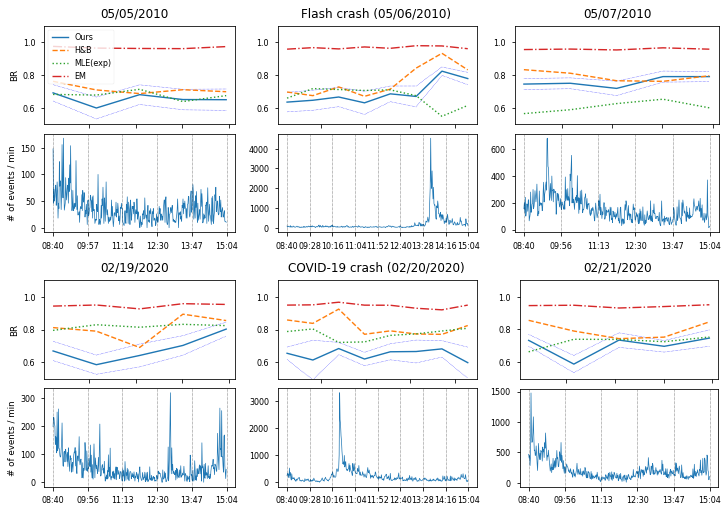

In [20]:
######### Parameters ##########
save = IMG_PATH + "emp/flash_vs_covid_BR.pdf"
###############################
typ = 'mid_change'
dates = ['05/05/2010', FLASH_DATE, '05/07/2010',
         '02/19/2020', COVID_DATE, '02/21/2020',
        ]
titles = ['05/05/2010', FLASH_TITLE, '05/07/2010',
          '02/19/2020', COVID_TITLE, '02/21/2020',
         ]
START = 8.5 * 60 + 10
END   = 15.25 * 60 - 10
estimators  = [BR_estimation, Hardiman, Exp_estimation, EM_estimation]
names       = ['Ours', 'H&B', 'MLE(exp)', 'EM']
line_styles = ['-', '--', ':','-.']

row = 2
col = 3
figsize = (10, 1 + row*3)

fig = plt.figure(constrained_layout=True, figsize=figsize)
subfigs = fig.subfigures(row, col)

for ind, subfig in enumerate(subfigs.flat):
    if ind in [1,4]:
        division = 8
    else:
        division = 5

    subfig.suptitle(titles[ind], x=.55)
    axs  = subfig.subplots(2, 1)
    date = dates[ind]
    tmp  = datas[ind//col][date][typ]
    tmp  = tmp[(tmp > START * 60) & (tmp < END * 60)]
    
    points = to_0_1(tmp)
    times  = np.arange(tmp[0], tmp[-1], (tmp[-1] - tmp[0]) / division)
    resss  = get_estimates(points, estimators, division=division)
    
    for k in range(len(estimators)):
        BRs = [j[k]['BR'] for j in resss]
        axs[0].plot(times, BRs, ls=line_styles[k], label=names[k])
        try:
            errs = [j[k]['SD(BR)'] for j in resss]
            axs[0].plot(times, np.array(BRs)+np.array(errs),
                        ls=':', lw=.5, c='blue')
            axs[0].plot(times, np.array(BRs)-np.array(errs),
                        ls=':', lw=.5, c='blue')
        except:
            pass

    axs[0].set_ylabel("BR")
    axs[0].xaxis.set_ticklabels([])
    axs[0].set_ylim(0.5, 1.1)

    price = copy(datas[ind//col][date]['price'])
    price = price[(price.index >= START) & (price.index <= END)]
    dN, _ = np.histogram(points, len(price))
    pd.Series(dN, index=np.arange(tmp[0], tmp[-1]-.01, (tmp[-1]-tmp[0])/len(dN)))\
             .plot(ax=axs[1], lw=.7)
    times = np.arange(tmp[0], tmp[-1] + (tmp[-1]-tmp[0])/division-.0000001, (tmp[-1]-tmp[0])/division)
    for t_i in times:
        axs[1].axvline(t_i, c='black', ls=':', lw=.5)
    axs[1].set_ylabel("# of events / min")
    axs[1].set_xticks(times, labels=format_minute(tmp[0], tmp[-1] + (tmp[-1]-tmp[0])/division, division+1))
    if ind == 0:
        axs[0].legend(loc="upper left")
    if ind % col != 0:
        axs[0].set_ylabel("")
        axs[1].set_ylabel("")
    for ax in axs:
        ax.label_outer()

if save != "":
    fig.savefig(save, bbox_inches="tight")